<a href="https://colab.research.google.com/github/aramakrishnan-006/pytorch-notebooks/blob/main/pytorch_regression_ann_syntheticdata.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [4]:
#Generating the Dataset
#Function being implemented is y = cos(2x1) + cos(3x2)
N = 1000
X = np.random.random((N, 2)) * 10 - 5
Y = np.cos(2 * X[:, 0]) + np.cos(3*X[:, 1])

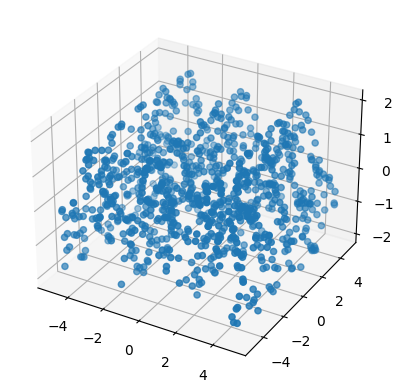

In [5]:
fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')
ax.scatter(X[:,0], X[:,1], Y)

In [7]:
#Build the Model
model = nn.Sequential(nn.Linear(2, 128), nn.ReLU(), nn.Linear(128,1))

criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

In [8]:
def full_gradientdescent(model, criterion, optimizer, X_train, y_train, epochs=1000):
  train_losses = np.zeros(epochs)

  for i in range(epochs):
    optimizer.zero_grad()
    outputs = model(X_train)

    loss = criterion(outputs, y_train)

    loss.backward()
    optimizer.step()

    train_losses[i] = loss.item()

    if (i + 1) % 50 == 0:
      print(f'Epoch {i + 1}/{epochs}: Train Loss {loss.item():.4f}')
  return train_losses


In [9]:
X_train = torch.from_numpy(X.astype(np.float32))
y_train = torch.from_numpy(Y.astype(np.float32))

In [10]:
train_losses = full_gradientdescent(model, criterion, optimizer, X_train, y_train)

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:536: UserWarning: Using a target size (torch.Size([1000])) that is different to the input size (torch.Size([1000, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch 50/1000: Train Loss 1.0354
Epoch 100/1000: Train Loss 1.0341
Epoch 150/1000: Train Loss 1.0340
Epoch 200/1000: Train Loss 1.0340
Epoch 250/1000: Train Loss 1.0340
Epoch 300/1000: Train Loss 1.0340
Epoch 350/1000: Train Loss 1.0340
Epoch 400/1000: Train Loss 1.0340
Epoch 450/1000: Train Loss 1.0340
Epoch 500/1000: Train Loss 1.0340
Epoch 550/1000: Train Loss 1.0340
Epoch 600/1000: Train Loss 1.0340
Epoch 650/1000: Train Loss 1.0340
Epoch 700/1000: Train Loss 1.0340
Epoch 750/1000: Train Loss 1.0340
Epoch 800/1000: Train Loss 1.0340
Epoch 850/1000: Train Loss 1.0340
Epoch 900/1000: Train Loss 1.0344
Epoch 950/1000: Train Loss 1.0340
Epoch 1000/1000: Train Loss 1.0340


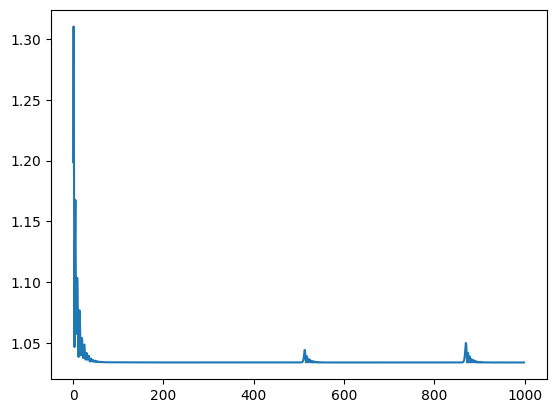

In [11]:
plt.plot(train_losses)

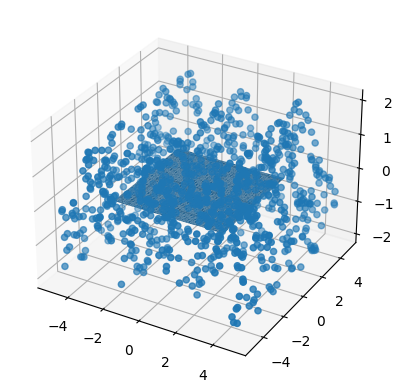

In [13]:
#Plot the prediction surface

fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')
ax.scatter(X[:, 0], X[:, 1], Y)

# Surface Plot
with torch.no_grad():
  line = np.linspace(-5, 5, 50)
  xx, yy = np.meshgrid(line, line)
  Xgrid = np.vstack((xx.flatten(), yy.flatten())).T
  Xgrid_torch = torch.from_numpy(Xgrid.astype(np.float32))
  Yhat = model(Xgrid_torch).numpy().flatten()
  ax.plot_trisurf(Xgrid[:,0], Xgrid[:,1], Yhat, linewidth=0.2, antialiased=True)
  plt.show()

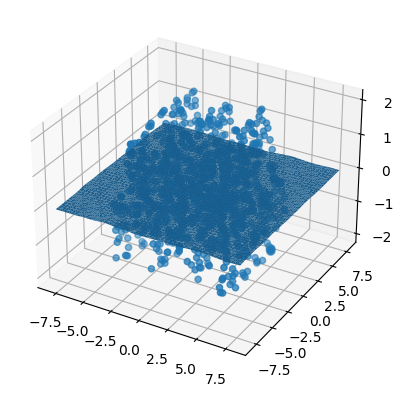

In [15]:
#Try extrapolating
fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')
ax.scatter(X[:, 0], X[:, 1], Y)

# Surface Plot
with torch.no_grad():
  line = np.linspace(-8, 8, 50)
  xx, yy = np.meshgrid(line, line)
  Xgrid = np.vstack((xx.flatten(), yy.flatten())).T
  Xgrid_torch = torch.from_numpy(Xgrid.astype(np.float32))
  Yhat = model(Xgrid_torch).numpy().flatten()
  ax.plot_trisurf(Xgrid[:,0], Xgrid[:,1], Yhat, linewidth=0.2, antialiased=True)
  plt.show()